DATA SCIENCE

TASK 1

percentage of restaurants offers table booking :  1.13 %
percentage of restaurants offers online delivery :  25.66 %
Rows With Table Booking :  (1158, 21)
Rows Without Table Booking :  (8393, 21)
average ratings : 
with table bookings :  3.44
without table bookings :  2.56


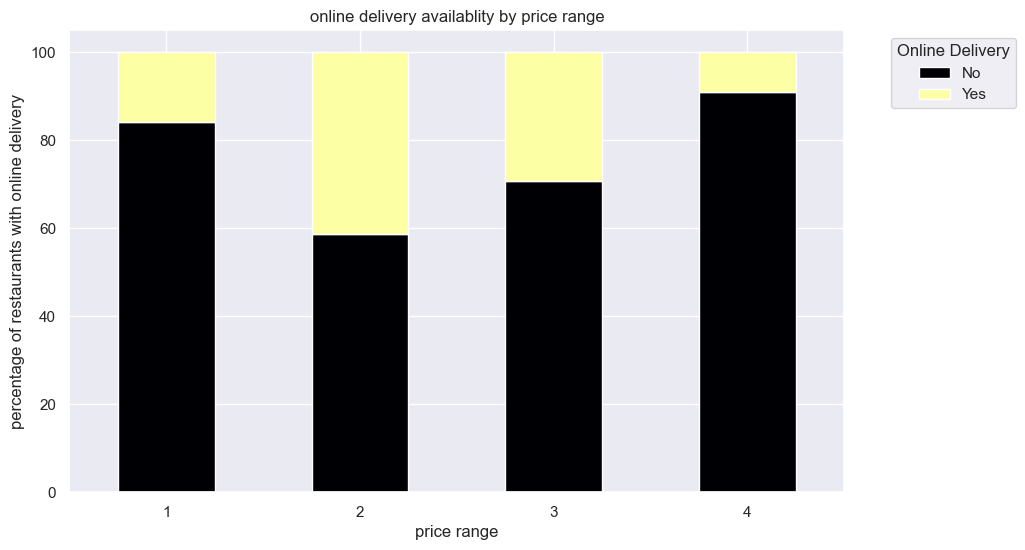

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


import warnings
warnings.filterwarnings ('ignore')

s1= pd.read_csv("data.csv")

s1["Has Table booking"].value_counts()
s1["Has Online delivery"].value_counts()
print("percentage of restaurants offers table booking : ", round((1128/(98393+1158))*100,2),"%")
print("percentage of restaurants offers online delivery : ", round((2451/(7100+2451))*100,2),"%")


df_with_table_booking = s1[s1['Has Table booking'] == 'Yes']
df_without_table_booking = s1[s1['Has Table booking'] == 'No']
print("Rows With Table Booking : ",df_with_table_booking.shape)
print("Rows Without Table Booking : ",df_without_table_booking.shape)

print("average ratings : ")
print("with table bookings : ", round(df_with_table_booking["Aggregate rating"].mean(),2))
print("without table bookings : ", round(df_without_table_booking["Aggregate rating"].mean(),2))


online_delivery_by_price_range = s1.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()*100
online_delivery_by_price_range.plot(kind='bar', stacked=True, colormap='inferno' , figsize=(10,6))
plt.title('online delivery availablity by price range')
plt.xlabel('price range')
plt.ylabel('percentage of restaurants with online delivery')
plt.xticks(rotation = 0)
plt.legend(title='Online Delivery',bbox_to_anchor = (1.05,1))


plt.show()

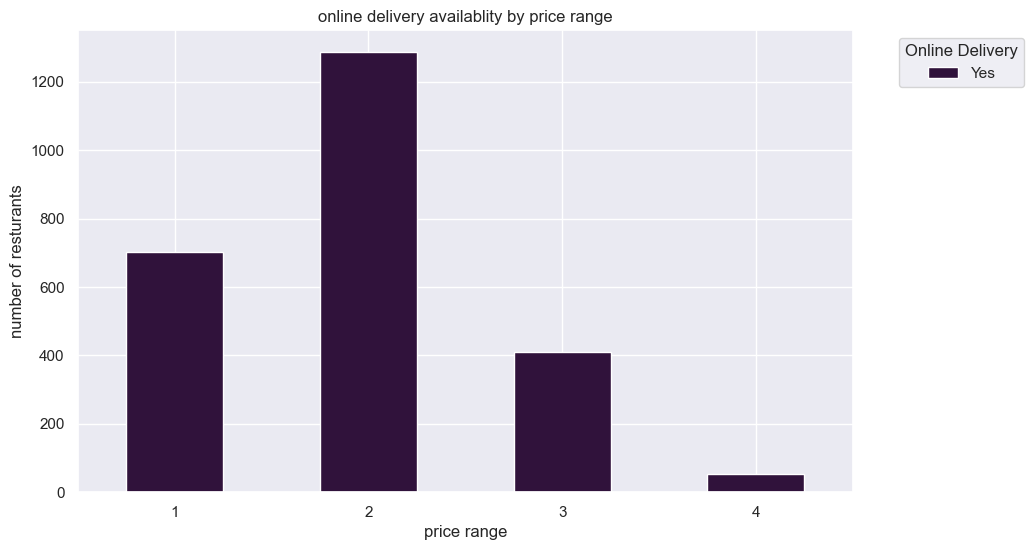

In [21]:
online_delivery_yes = s1[s1['Has Online delivery'] == 'Yes']
online_delivery_counts = online_delivery_yes.groupby(['Price range','Has Online delivery']).size().unstack()
online_delivery_counts.plot(kind='bar', stacked=True, colormap='turbo', figsize=(10,6))
plt.title('online delivery availablity by price range')
plt.xlabel('price range')
plt.ylabel('number of resturants')
plt.xticks(rotation = 0)
plt.legend(title='Online Delivery',bbox_to_anchor = (1.05,1),loc='upper left')

plt.show()

TASK 2

most common price range among all the restaurants :  1
average rating for each price range :
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


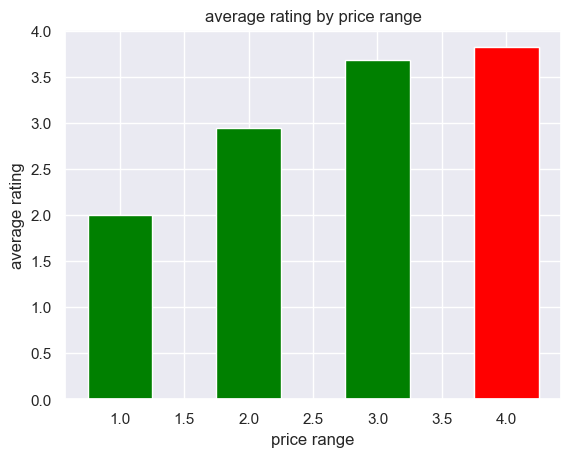

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


import warnings
warnings.filterwarnings ('ignore')

s1 = pd.read_csv("data.csv")

s1["Price range"].value_counts()
most_common = s1["Price range"].mode()[0]
print("most common price range among all the restaurants : ",most_common)

avg_rating_by_price_range = s1.groupby('Price range')['Aggregate rating'].mean().round(2)
print("average rating for each price range :")
print(avg_rating_by_price_range)

highest_avg_rating_color = avg_rating_by_price_range.idxmax()
plt.bar(avg_rating_by_price_range.index,avg_rating_by_price_range,color='green',width=0.5)
plt.bar(highest_avg_rating_color,avg_rating_by_price_range[highest_avg_rating_color],color='red',width=0.5)

plt.title('average rating by price range')
plt.ylabel('average rating')
plt.xlabel('price range')
plt.show()

TASK 3

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


import warnings
warnings.filterwarnings ('ignore')

s1 = pd.read_csv("data.csv")
s1['Restaurant Name Length'] = s1['Restaurant Name'].apply(lambda x: len(str(x)))
s1['Address Length'] = s1['Address'].apply(lambda x: len(str(x)))
s1[['Restaurant Name','Restaurant Name Length','Address','Address Length']]

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


In [24]:
s1['Has Table booking'] = s1['Has Table booking'].apply(lambda x:1 if x == 'Yes' else 0)
s1['Has Online delivery'] = s1['Has Online delivery'].apply(lambda x:1 if x == 'Yes' else 0)
s1[['Has Table booking','Has Table booking','Has Online delivery','Has Online delivery']]

,Has Table booking,Has Table booking,Has Online delivery,Has Online delivery
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,0,0,0,0
4,1,1,0,0
...,...,...,...,...
9546,0,0,0,0
9547,0,0,0,0
9548,0,0,0,0
9549,0,0,0,0
